In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import nltk
nltk.download('all')

df = pd.read_csv('base/imdb-reviews-pt-br.csv')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [3]:
df.head(5)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
# Observando texto negativo 
print('Negativa \n')
print(df.text_pt[ 200 ])

Negativa 

Este é o terceiro filme em um mês que eu assisti que não saiu do jeito que eu esperava. Os dois primeiros são A Dália Negra e Hollywoodland, nenhum dos quais deu novas idéias de quem cometeu os crimes. Eu sempre tive um fascínio com OVNIs e estava tão empolgado para ver um novo filme sobre o tema da investigação sobre OVNIs que não era um comédia. Mas depois de 30 minutos, tudo deu muito errado. Eu poderia ter defendido a atuação, os ângulos de câmera, os estereótipos se houvesse uma boa história sobre perseguir OVNIs, mas nenhum aqui. Eu não estou dizendo que havia algo de errado com o assunto, mas Netflix empurrou este filme como um cético OVNI e um crente de OVNI investigando vários sitations.I parou de assistir a meio caminho. Não posso acreditar que perdi tanto tempo com este. Por favor, não cometa o mesmo erro que eu fiz.


In [5]:
# Observando texto positivo
print('Positivo \n')
print(df.text_pt[ 49034 ])

Positivo 

Este foi um filme muito divertido e eu realmente gostei, eu normalmente não alugar filmes como estes ie. No entanto, eu fui atraído pelo filme porque tinha um elenco incrível que incluía Jamie Kennedy, a quem eu amei desde a trilogia Scream. O diretor do filme assumiu um risco e é um risco arriscado em contar a vida de muitos e eu quero dizer MUITAS pessoas diferentes e ter o entrelaçamento em vários intervalos. Assumir esse risco foi uma boa ideia porque seu resultado final é um filme extremamente bom. O filme tem alguns personagens principais; Dwight Jamie Kennedy - um escritor descontente da fortuna cujo relacionamento com a namorada está em dificuldades por causa de uma discussão. Wallace Gregory John Carroll Lynch - um carregador de avião / técnico que tem um amor por todas as coisas vivas, exceto, talvez, as criadas e que, apesar de seu bom coração, tem uma quantidade crescente de azar. Cyr Brian Cox - o dono de um restaurante chinês / donut shop que é um germaphobe e 

In [6]:
# Observando a distribuição dos dados
print(df.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [7]:
# Criando uma nova coluna com valores 0 para neg e 1 para pos
classificacao = df['sentiment'].replace( [ 'neg', 'pos' ], [0, 1] )
#adicionando a nova coluna no dataset
df['classificacao'] = classificacao

### Bag of Words teste

In [8]:
# Utilizando Bag of words
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme ótimo', 'Assisti um filme ruim']
# deixei o valor lowercase como False  para no momento manter os dados originais
vetor = CountVectorizer(lowercase = False)
bag_of_words = vetor.fit_transform(texto)

In [9]:
vetor.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [10]:
# Criando uma matriz esparsa
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                                    columns=vetor.get_feature_names())

In [11]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


### Bag of Words IMDB

In [12]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetor = CountVectorizer(lowercase = False, max_features = 50) # max_features é a quantidade de vetores criados
    bag_of_words = vetor.fit_transform(texto[coluna_texto])

    # Dividindo os dados em treino e teste
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    # Criando o modelo
    regressao_log = LogisticRegression()
    regressao_log.fit(treino, classe_treino)
    return regressao_log.score(teste, classe_teste)

print(classificar_texto(df, 'text_pt', 'classificacao'))


0.6583097452486858


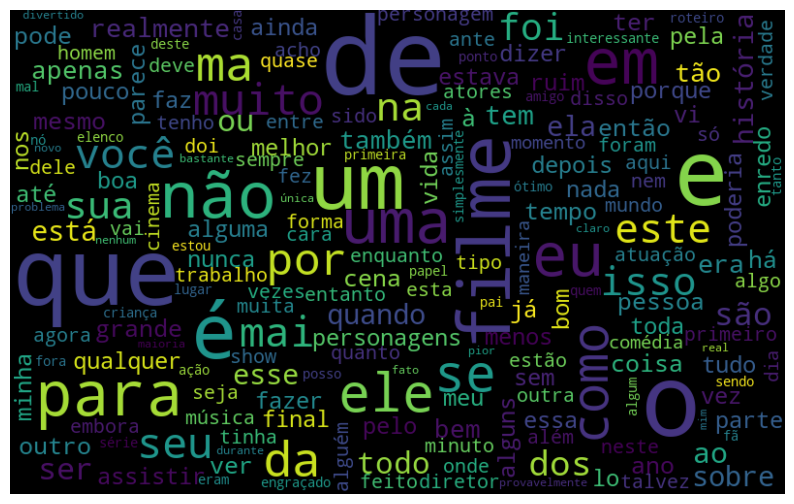

In [13]:
# Criando uma wordcloud
%matplotlib inline

from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in df.text_pt])
# Criando a nuvem de palavras
nuvem_palavras = WordCloud(width = 800, height = 500,
                           max_font_size = 110,
                            collocations = False ).generate(todas_palavras)# max_font_size = tamanho da fonte
# Plotando nuvem de palavras
plt.figure(figsize = (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear' )
# Retirando os eixos da imagem
plt.axis('off')
plt.show()

In [14]:
# Olhando os sentimentos positivos
df.query("sentiment == 'pos' ")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [15]:
# Olhando os sentimentos negativos
df.query("sentiment == 'neg' ")

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
37113,37115,"Towards the end of the movie, I felt it was to...","No final do filme, senti que era muito técnico...",neg,0
37114,37116,This is the kind of movie that my enemies cont...,Este é o tipo de filme que meus inimigos me as...,neg,0
37115,37117,I saw Descent last night at the Stockholm Film...,Eu vi Descent na noite passada no Stockholm Fi...,neg,0
37116,37118,Some films that you pick up for a pound turn o...,Alguns filmes que você escolhe por um quilo sã...,neg,0


In [16]:
# Função para plotar só sentimentos negativos
def sentimento_neg(texto, coluna_texto):
    # pegando só as linhas negativas
    texto_negativo = texto.query("sentiment == 'neg' ")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                            max_font_size = 110,
                            collocations = False).generate(todas_palavras)
    
    plt.figure(figsize = (10, 7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [17]:
# Função que plota sentimentos positivos
def sentimento_pos(texto, coluna_texto):
    # pegando os as linhas positivas
    texto_positivo = texto.query("sentiment == 'pos' ")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                               max_font_size = 110,
                               collocations = False).generate(todas_palavras)
    
    plt.figure(figsize = (10, 7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()


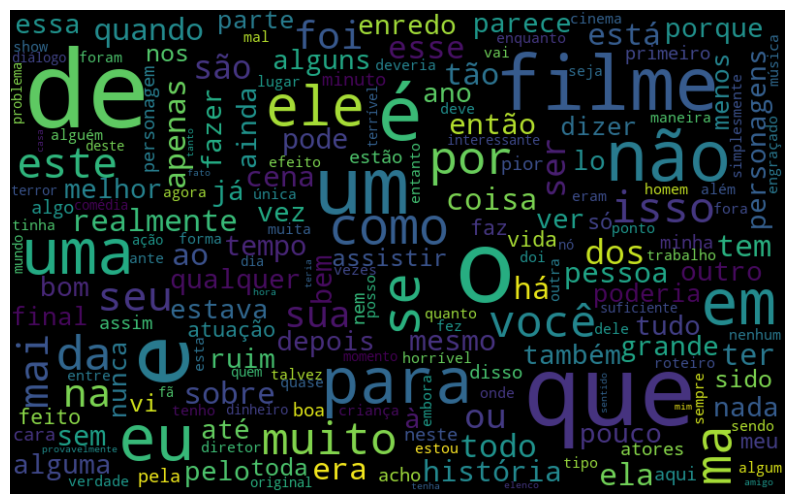

In [18]:
sentimento_neg(df, 'text_pt')

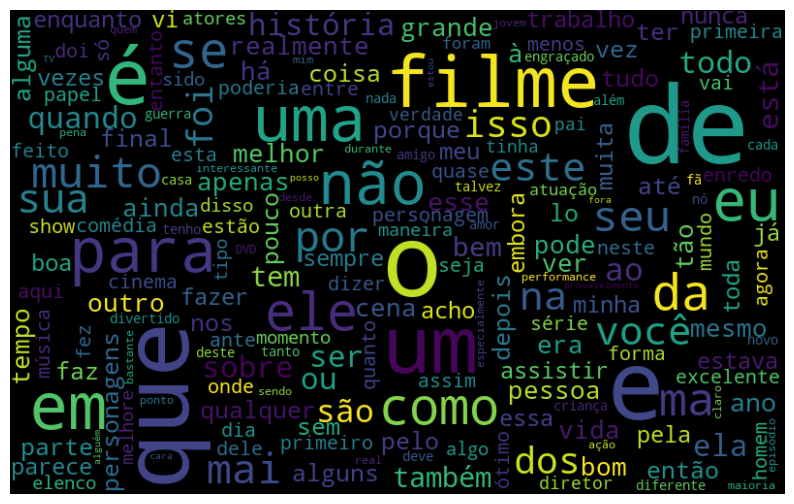

In [19]:
sentimento_pos(df, 'text_pt')

### Otilizando NLTK 

In [20]:
from nltk import tokenize

# Criando a tokenização dos dados por espaços em branco
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
# Observando a frequencia das palavras no corpus
frequencia = nltk.FreqDist(token_frase)
# Criando um dataset com a lista de palavras e lista com a frequencia que a palavra aparece no corpus
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequencia': list(frequencia.values())})

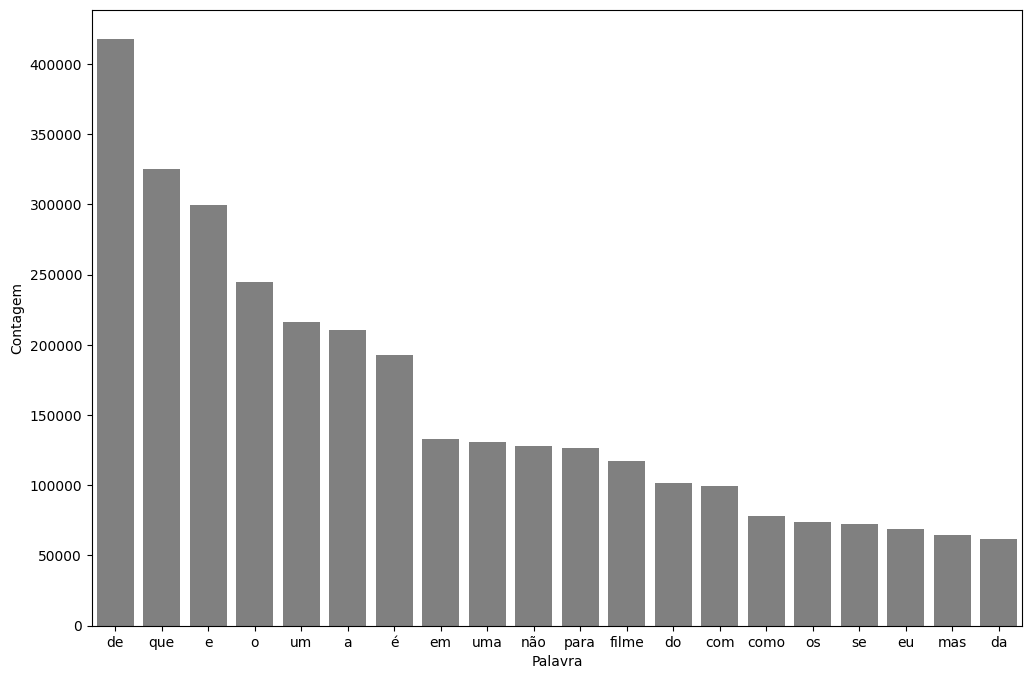

In [21]:
def  pareto(texto, coluna_texto, quantidade):
   # Utilizando o Diagrama de pareto com as palavras e suas frenquencias
   from nltk import tokenize
   import seaborn as sns

   todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
   # Criando a tokenização dos dados por espaços em branco
   token_espaco = tokenize.WhitespaceTokenizer()
   token_frase = token_espaco.tokenize(todas_palavras)

   # Observando a frequencia das palavras no corpus
   frequencia = nltk.FreqDist(token_frase)

   # Criando um dataset com a lista de palavras e lista com a frequencia que a palavra aparece no corpus
   df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                 'Frequencia': list(frequencia.values())})

   # usando o nlargest para trazer apenas as 10 palavras mais frequentes
   df_frequencia = df_frequencia.nlargest(columns = 'Frequencia', n = 20)

   # Tamanho da imagem
   plt.figure(figsize = (12, 8))

   # Colocando as palavras no eixo X e as frequencias no eixo Y
   ax = sns.barplot(data = df_frequencia, x = 'Palavra', y = 'Frequencia', color = 'gray')
   ax.set(ylabel = 'Contagem')
   plt.show()
   
pareto(df, 'text_pt', 20)

### Utilizando Stop Words

In [22]:
# importante os stopwords em português
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = list()
for opiniao in df.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            # Criando uma lista com todos as palavras de cada frase
            nova_frase.append(palavra)
            # Separando as palavras de cada frase
    frase_processada.append(' '.join(nova_frase))
# Criando uma nova coluna já com o primeiro tratamento retirando as stop words
df['tratamento_1'] = frase_processada

In [23]:
df.head(5)

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [24]:
# Utilizando acuracia para ver se com o tratamento obtivemos melhora
classificar_texto(df, 'tratamento_1', 'classificacao')

0.6811160533764659

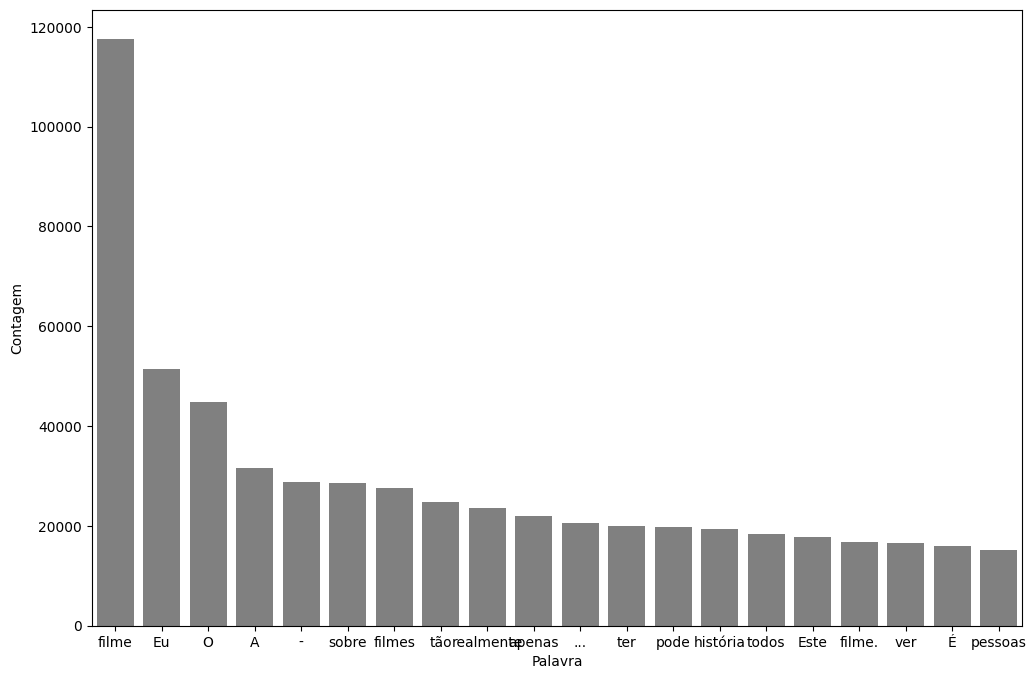

In [25]:
# Observando o diagrama de pareto
pareto(df, 'tratamento_1', 20)

### Tratamento 2

In [26]:
from string import punctuation
token_pontuacao = tokenize.WordPunctTokenizer()
 # Retirando as pontuações do nosso corpus e juntando com as palavras errelevantes
pontuacao = list()

for ponto in punctuation:
    pontuacao.append(ponto)
# juntando as palavras stopwords com as pontuações
pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in df['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [29]:
classificar_texto(df, 'tratamento_1', 'classificacao')

0.6811160533764659

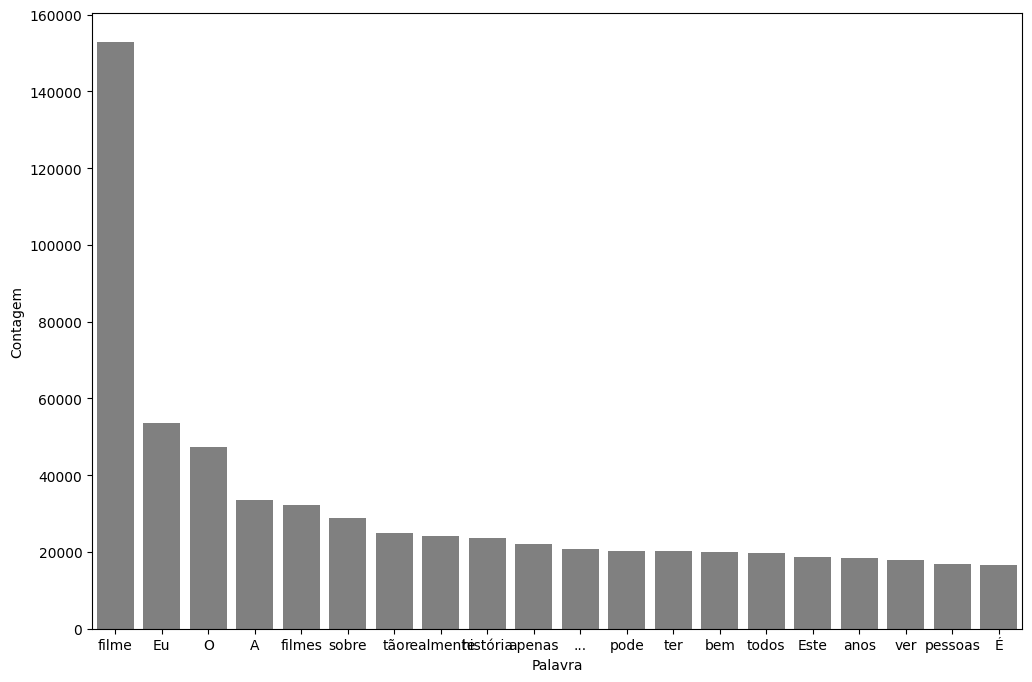

In [30]:
pareto(df, 'tratamento_2', 20)

In [31]:
# Retirando os acentos das palavras
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

In [32]:
# retirando os acendos dos stopwords
stopwords = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [34]:
df['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in df['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

In [35]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [37]:
classificar_texto(df, 'tratamento_3', 'classificacao')

0.6887990295188031

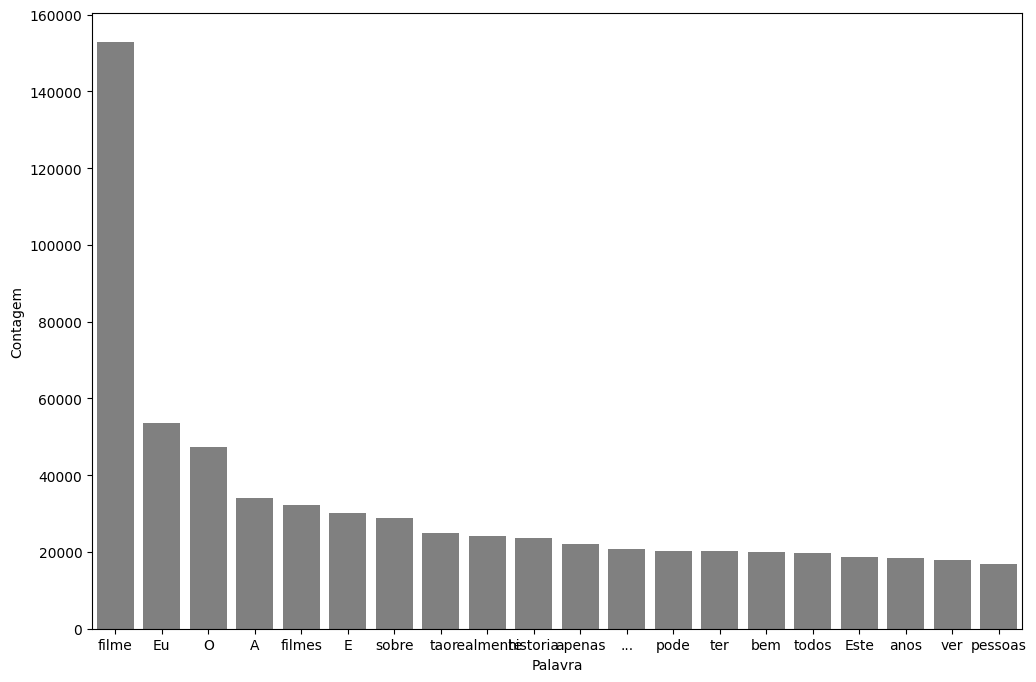

In [38]:
pareto(df, 'tratamento_3', 20)